# Laboratorio 4

- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB4-IA

## Task 1 - Preguntas Teóricas

1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el
cálculo de gradientes en aplicaciones como backpropagation

Gráfico acíclico dirigido, para representar la expresión matemática final y cada nodo representa subexpresiones intermedias.

* Ayuda a simplificar el proceso
* Ayuda a obtener más información de la naturaleza y estructura modular de los cálculos de gradientes

2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo
mejoraría el perceptrón que hizo en el laboratorio pasado?

**Componentes:**
* a

3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-
Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.

El método de la silueta ayuda a determinar el número óptimo de clusters (K) en K-means evaluando la calidad de la agrupación. Se basa en dos medidas:

1. **Cohesión (a)**: Representando el promedio de la distancia entre un punto y todos los demás puntos dentro de su mismo cluster
2. **Separación (b)**: Representa el promedio de la distancia entre un punto y todos los puntos del cluster más cercano

La fórmula para el coeficiente de silueta es:
  $$ s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}   $$ 

Donde:
- s(i) es el coeficiente de silueta para el punto i
- a(i) es la cohesión
- b(i) es la separación

Si el coeficiente varía entre -1 y 1:
- Valores cercanos a 1 indican buena agrupación
- Valores cercanos a 0 indican solapamiento
- Valores negativos indican mala asignación

Asumpciones:
- Los clusters están bien separados
- Los datos tienen una estructura de agrupamiento natural
- La distancia es una medida significativa de similitud

4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:
a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?

- Reduciendo la dimensionalidad de los datos conservando la información más relevante/importante

- Mejora la visualización al proyectar los datos en 2 o 3 dimensiones principales, facilitando la interpretación de los clusters


#### Referencias:
- Improve, A. 27 F. (2018, julio 7). Principal component analysis(PCA). GeeksforGeeks. https://www.geeksforgeeks.org/principal-component-analysis-pca/

- Jaadi, Z. (2021, abril 1). Principal Component Analysis (PCA): A step-by-step explanation. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

- Ramirez, J. (2018, diciembre 25). K-means: Elbow method and silhouette - Jonathan Ramirez. Medium. https://medium.com/@jonathanrmzg/k-means-elbow-method-and-silhouette-e565d7ab87aa

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

### **Importar las librerías a utilizar**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler

### **Leer archivo de datos**

In [42]:
data = pd.read_csv("bank_transactions.csv")

### **Obtener las primeros 15 datos**

In [43]:
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
None


### **Exploración de datos**

In [45]:
print(data.describe())
print(data.isnull().sum())

       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


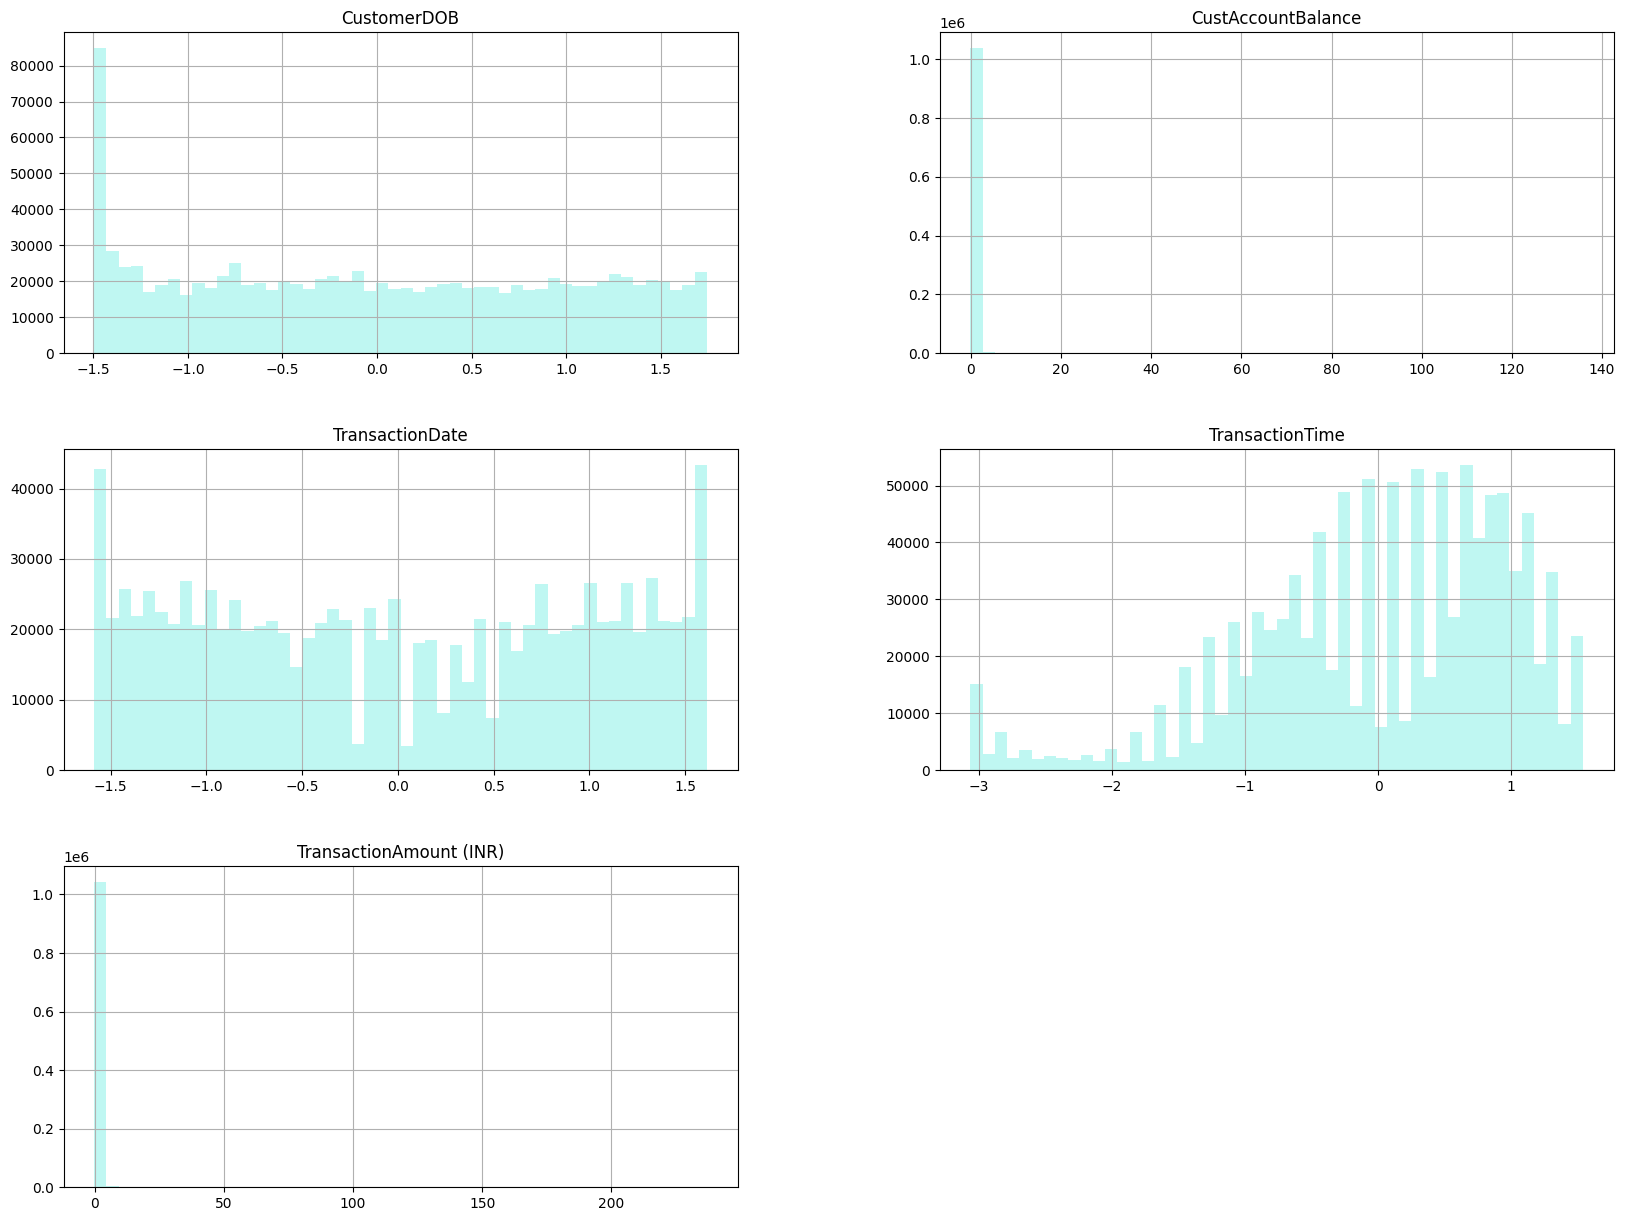

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding de las variables categóricas
categorical_columns = ['CustomerDOB', 'TransactionDate']
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


# Escalar las variables numéricas
numeric_features = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Selección de variables
X = data[numeric_features]

# Visualización de la distribución de las variables
data.hist(bins=50, figsize=(20, 15), color='#bff7f2')
plt.show()

#### Task 2.1.1 - K-Means

##### **K-Means | Uso de librerías**

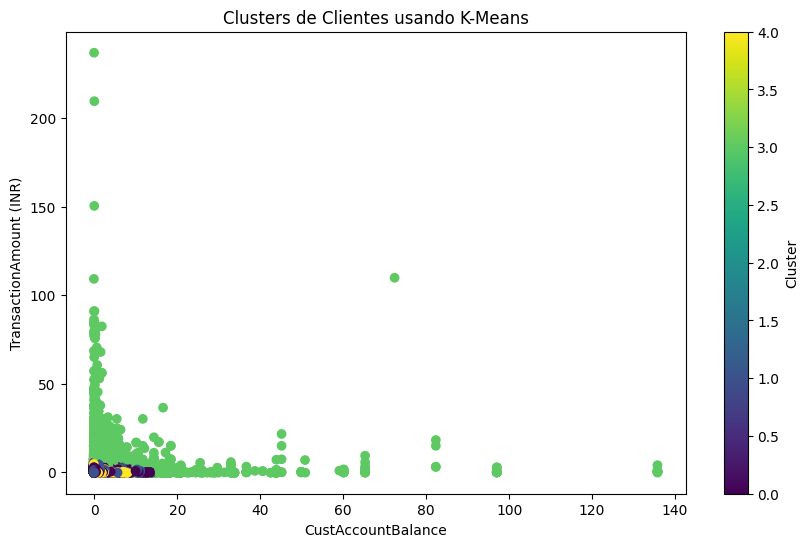

In [64]:
from sklearn.cluster import KMeans

# Imputar los valores faltantes
X_imputed = imputer.fit_transform(X)

# Definir el modelo de K-Means
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X_imputed)

# Predecir las etiquetas de los clusters
labels_kmeans = kmeans.predict(X_imputed)

# Agregar las etiquetas al DataFrame original
data['Cluster_KMeans'] = labels_kmeans

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=labels_kmeans, cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('Clusters de Clientes usando K-Means')
plt.colorbar(label='Cluster')
plt.show()

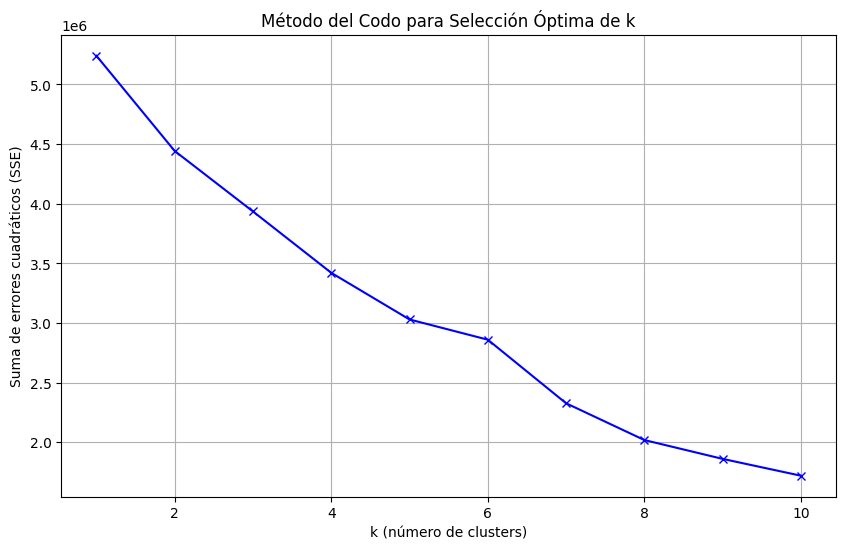

In [65]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

# Imputar los valores faltantes si no se ha hecho
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Calcular SSE para diferentes valores de k
sse = []
k_range = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_imputed)
    sse.append(kmeans.inertia_)

# Crear el gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k (número de clusters)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para Selección Óptima de k')
plt.grid(True)
plt.show()

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

#### Task 2.2.1 - Mixture Models

##### **Gaussian Mixture | Uso de librerías**

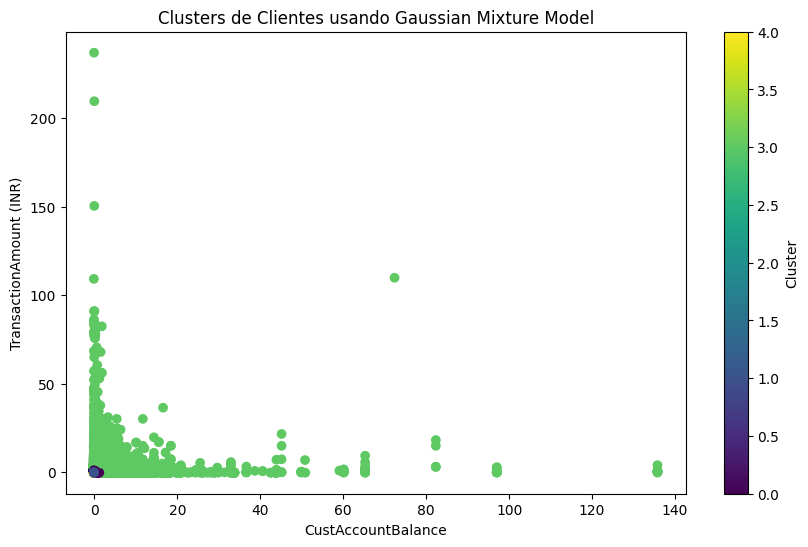

In [60]:
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Definir el modelo de Gaussian Mixture
gmm = GaussianMixture(n_components=5, random_state=42)

# Ajustar el modelo a los datos
gmm.fit(X_imputed)

# Predecir las etiquetas de los clusters
labels = gmm.predict(X_imputed)

# Agregar las etiquetas al DataFrame original
data['Cluster'] = labels

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=labels, cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('Clusters de Clientes usando Gaussian Mixture Model')
plt.colorbar(label='Cluster')
plt.show()